#1. Data Exploration and Feature Engineering [1]

- a) Perform a thorough exploratory data analysis (EDA) on the dataset. Include advanced visualizations (e.g., pair plots, correlation heatmaps) and statistical summaries. Identify any anomalies or patterns. [0.5]
- b) Convert categorical features into numerical representations using one-hot encoding. Compare the resulting dataset to label encoding and briefly discuss the advantages and disadvantages of each technique in the context of this dataset. [0.5]

In [ ]:
from google.colab import files
uploaded = files.upload()  #Upload dataset

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data.csv')
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.shape

(11914, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  string
 1   Model              11914 non-null  string
 2   Year               11914 non-null  Int64 
 3   Engine Fuel Type   11911 non-null  string
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  string
 7   Driven_Wheels      11914 non-null  string
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   string
 10  Vehicle Size       11914 non-null  string
 11  Vehicle Style      11914 non-null  string
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(8), string(8)
memory usage: 1.5

Handling duplicated values

In [ ]:
df.duplicated().sum()

715

It is observed that there are 715 duplicate records and hence they have to be dropped.

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.describe(exclude=['number']) #For categorical features

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11199,11199,11196,11199,11199,7823,11199,11199
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1083,156,6658,7932,4354,1075,4395,2843


Handling missing values

In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

It can be observed that there are 3 missing values in Engine fuel type, 69 in Engine HP, 30 in engine cyclinders, 6 in number of doors, and 3376 in market category. 3376 missing values is a very large number and it would be benificial to drop the column market category.

In [ ]:
df.drop('Market Category', axis=1, inplace=True)

In [ ]:
print("Engine HP:")
print("Mean:", df['Engine HP'].mean())
print("Median:", df['Engine HP'].median())
print("Mode:", df['Engine HP'].mode())

print("\nEngine Cylinders:")
print("Mean:", df['Engine Cylinders'].mean())
print("Median:", df['Engine Cylinders'].median())
print("Mode:", df['Engine Cylinders'].mode())


Engine HP:
Mean: 253.38885893980233
Median: 239.0
Mode: 0    200
dtype: Int64

Engine Cylinders:
Mean: 5.66595039842421
Median: 6.0
Mode: 0    4
dtype: Int64


The other columns with minimal missing values can be imputed using:
- median for continuous features as median seems to follow the expected datatype and is not very different from the mean.
- most freq.(mode) for categorical features.

In [ ]:
# replace missing values with mean for continuous features
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

# replace missing values with most frequent for categorical features
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

Handling outliers

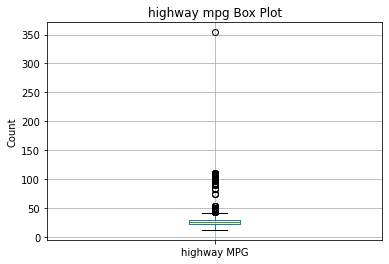

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column=['highway MPG'])
plt.title('highway mpg Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['highway MPG'] < (Q1 - 1.5 * IQR)) | (df['highway MPG'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

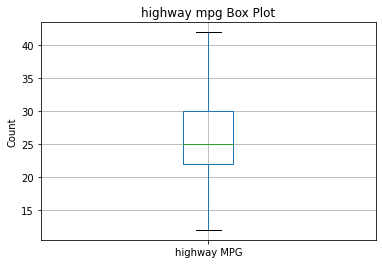

In [ ]:
df.boxplot(column=['highway MPG'])
plt.title('highway mpg Box Plot')
plt.ylabel('Count')
plt.show()

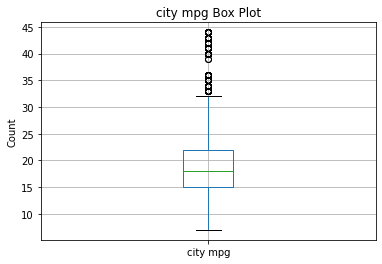

In [ ]:
df.boxplot(column=['city mpg'])
plt.title('city mpg Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
Q1 = df['city mpg'].quantile(0.25)
Q3 = df['city mpg'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['city mpg'] < (Q1 - 1.5 * IQR)) | (df['city mpg'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

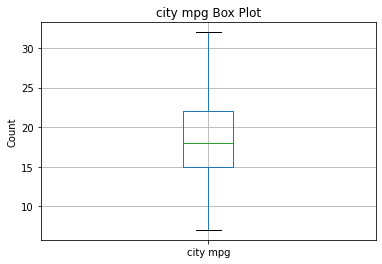

In [ ]:
df.boxplot(column=['city mpg'])
plt.title('city mpg Box Plot')
plt.ylabel('Count')
plt.show()

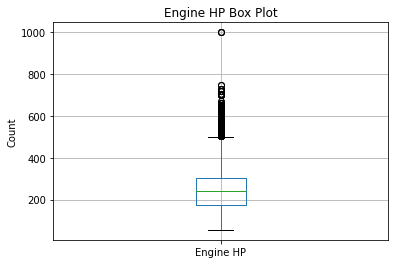

In [ ]:
df.boxplot(column=['Engine HP'])
plt.title('Engine HP Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['Engine HP'] < (Q1 - 1.5 * IQR)) | (df['Engine HP'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

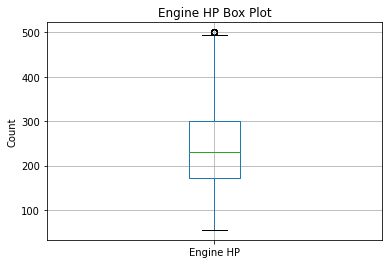

In [ ]:
df.boxplot(column=['Engine HP'])
plt.title('Engine HP Box Plot')
plt.ylabel('Count')
plt.show()

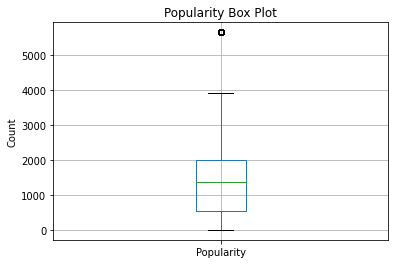

In [ ]:
df.boxplot(column=['Popularity'])
plt.title('Popularity Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['Popularity'] < (Q1 - 1.5 * IQR)) | (df['Popularity'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

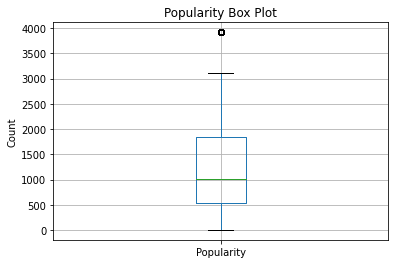

In [ ]:
df.boxplot(column=['Popularity'])
plt.title('Popularity Box Plot')
plt.ylabel('Count')
plt.show()

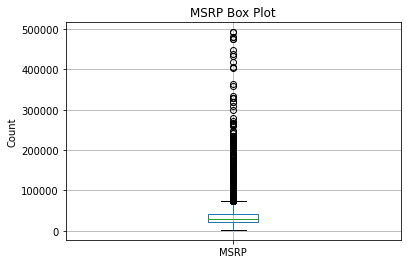

In [ ]:
df.boxplot(column=['MSRP'])
plt.title('MSRP Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
Q1 = df['MSRP'].quantile(0.25)
Q3 = df['MSRP'].quantile(0.75)

IQR = Q3-Q1
outliers_df = df[(df['MSRP'] < (Q1 - 1.5 * IQR)) | (df['MSRP'] > (Q3 + 1.5 * IQR))]
df.drop(outliers_df.index, inplace=True) #eliminating outliers

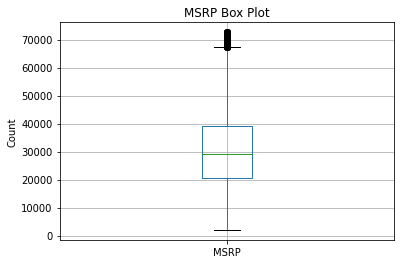

In [ ]:
df.boxplot(column=['MSRP'])
plt.title('MSRP Box Plot')
plt.ylabel('Count')
plt.show()

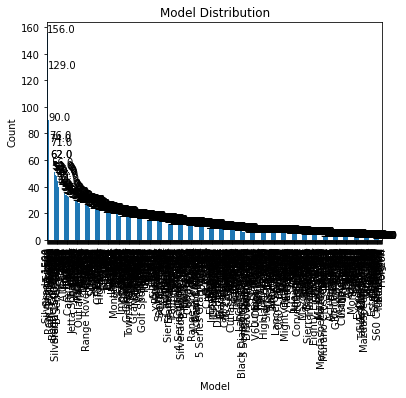

In [ ]:
ax = df['Model'].value_counts().plot(kind='bar')
plt.title('Model Distribution')
plt.xlabel('Model')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Model'].value_counts()

threshold = 0.001 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Model'].isin(outliers)] #eliminating outliers for categorical features

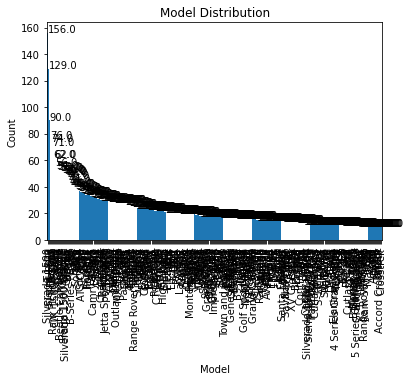

In [ ]:
ax = df['Model'].value_counts().plot(kind='bar')
plt.title('Model Distribution')
plt.xlabel('Model')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

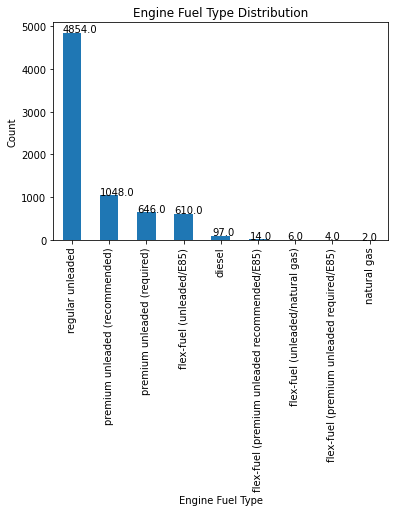

In [ ]:
ax = df['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.title('Engine Fuel Type Distribution')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Engine Fuel Type'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Engine Fuel Type'].isin(outliers)] #eliminating outliers for categorical features

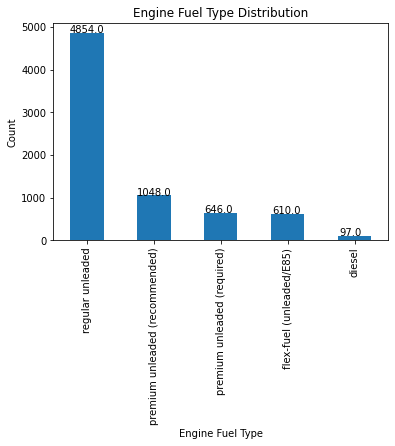

In [ ]:
ax = df['Engine Fuel Type'].value_counts().plot(kind='bar')
plt.title('Engine Fuel Type Distribution')
plt.xlabel('Engine Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

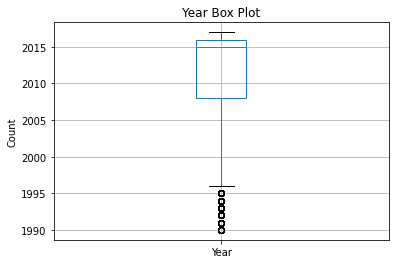

In [ ]:
df.boxplot(column=['Year'])
plt.title('Year Box Plot')
plt.ylabel('Count')
plt.show()

In [ ]:
category_counts = df['Year'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Year'].isin(outliers)] #eliminating outliers for categorical features

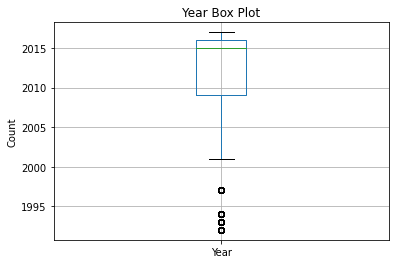

In [ ]:
df.boxplot(column=['Year'])
plt.title('Year Box Plot')
plt.ylabel('Count')
plt.show()

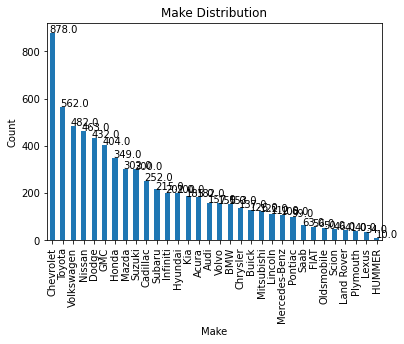

In [ ]:
ax = df['Make'].value_counts().plot(kind='bar')
plt.title('Make Distribution')
plt.xlabel('Make')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Make'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Make'].isin(outliers)]


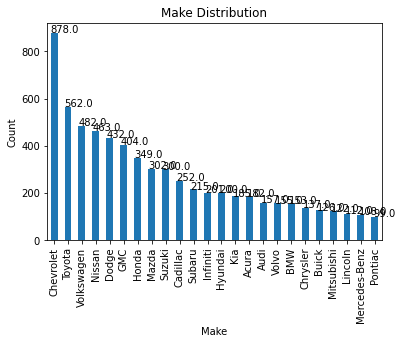

In [ ]:
ax = df['Make'].value_counts().plot(kind='bar')
plt.title('Make Distribution')
plt.xlabel('Make')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

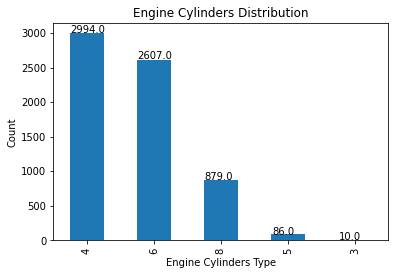

In [ ]:
ax = df['Engine Cylinders'].value_counts().plot(kind='bar')
plt.title('Engine Cylinders Distribution')
plt.xlabel('Engine Cylinders Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Engine Cylinders'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Engine Cylinders'].isin(outliers)]

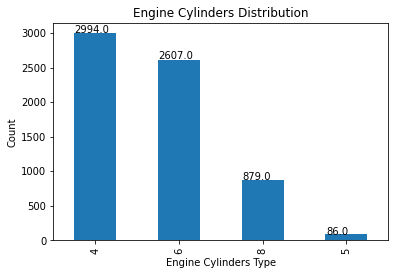

In [ ]:
ax = df['Engine Cylinders'].value_counts().plot(kind='bar')
plt.title('Engine Cylinders Distribution')
plt.xlabel('Engine Cylinders Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

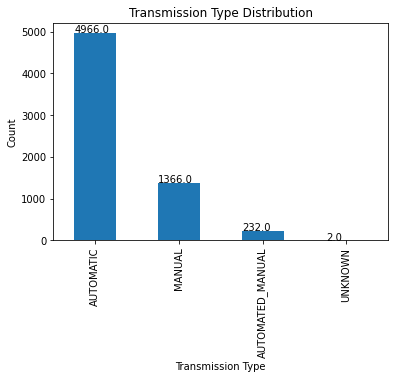

In [ ]:
ax = df['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Transmission Type'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index
df = df[~df['Transmission Type'].isin(outliers)]

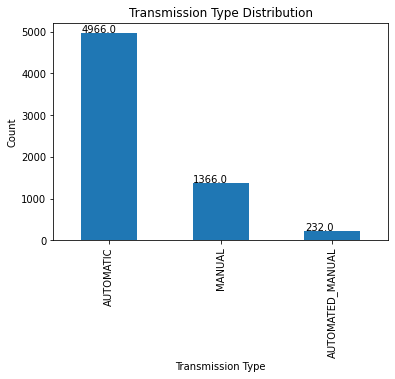

In [ ]:
ax = df['Transmission Type'].value_counts().plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

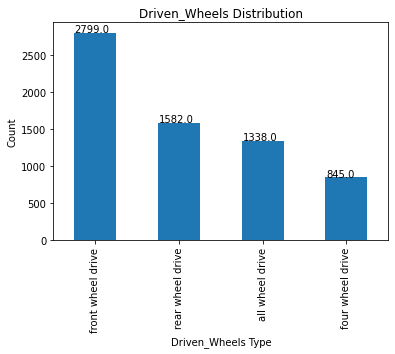

In [ ]:
ax = df['Driven_Wheels'].value_counts().plot(kind='bar')
plt.title('Driven_Wheels Distribution')
plt.xlabel('Driven_Wheels Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

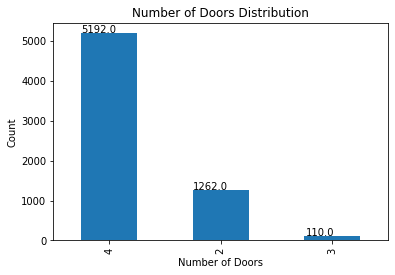

In [ ]:
ax = df['Number of Doors'].value_counts().plot(kind='bar')
plt.title('Number of Doors Distribution')
plt.xlabel('Number of Doors')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

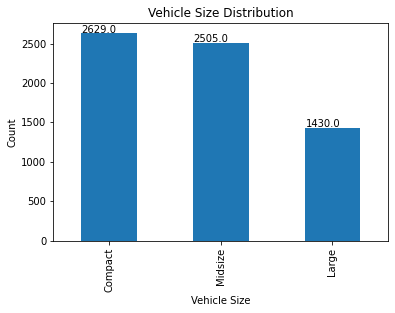

In [ ]:
ax = df['Vehicle Size'].value_counts().plot(kind='bar')
plt.title('Vehicle Size Distribution')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

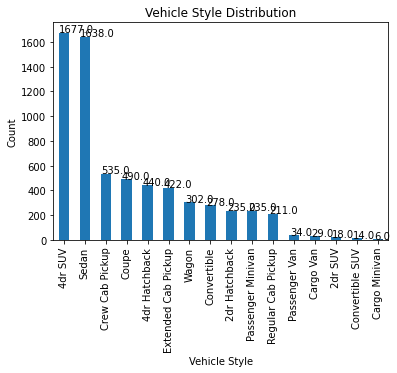

In [ ]:
ax = df['Vehicle Style'].value_counts().plot(kind='bar')
plt.title('Vehicle Style Distribution')
plt.xlabel('Vehicle Style')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [ ]:
category_counts = df['Vehicle Style'].value_counts()

threshold = 0.01 * len(df)
outliers = category_counts[category_counts < threshold].index

df = df[~df['Vehicle Style'].isin(outliers)]

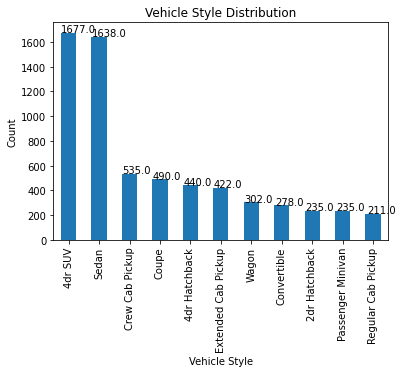

In [ ]:
ax = df['Vehicle Style'].value_counts().plot(kind='bar')
plt.title('Vehicle Style Distribution')
plt.xlabel('Vehicle Style')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

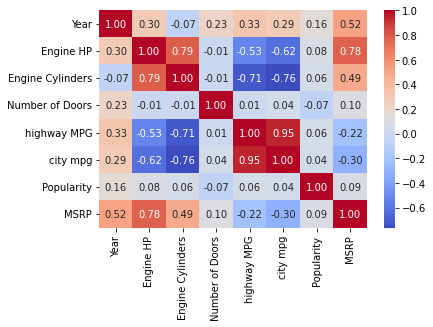

In [ ]:
#Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


There seems to be a high correlation between:
- year, engine HP and MSRP
- Engine HP, engine cylinders, highway mpg and city mpg.

The following columns have low correlation with all other columns:
- Popularity
- Number of door

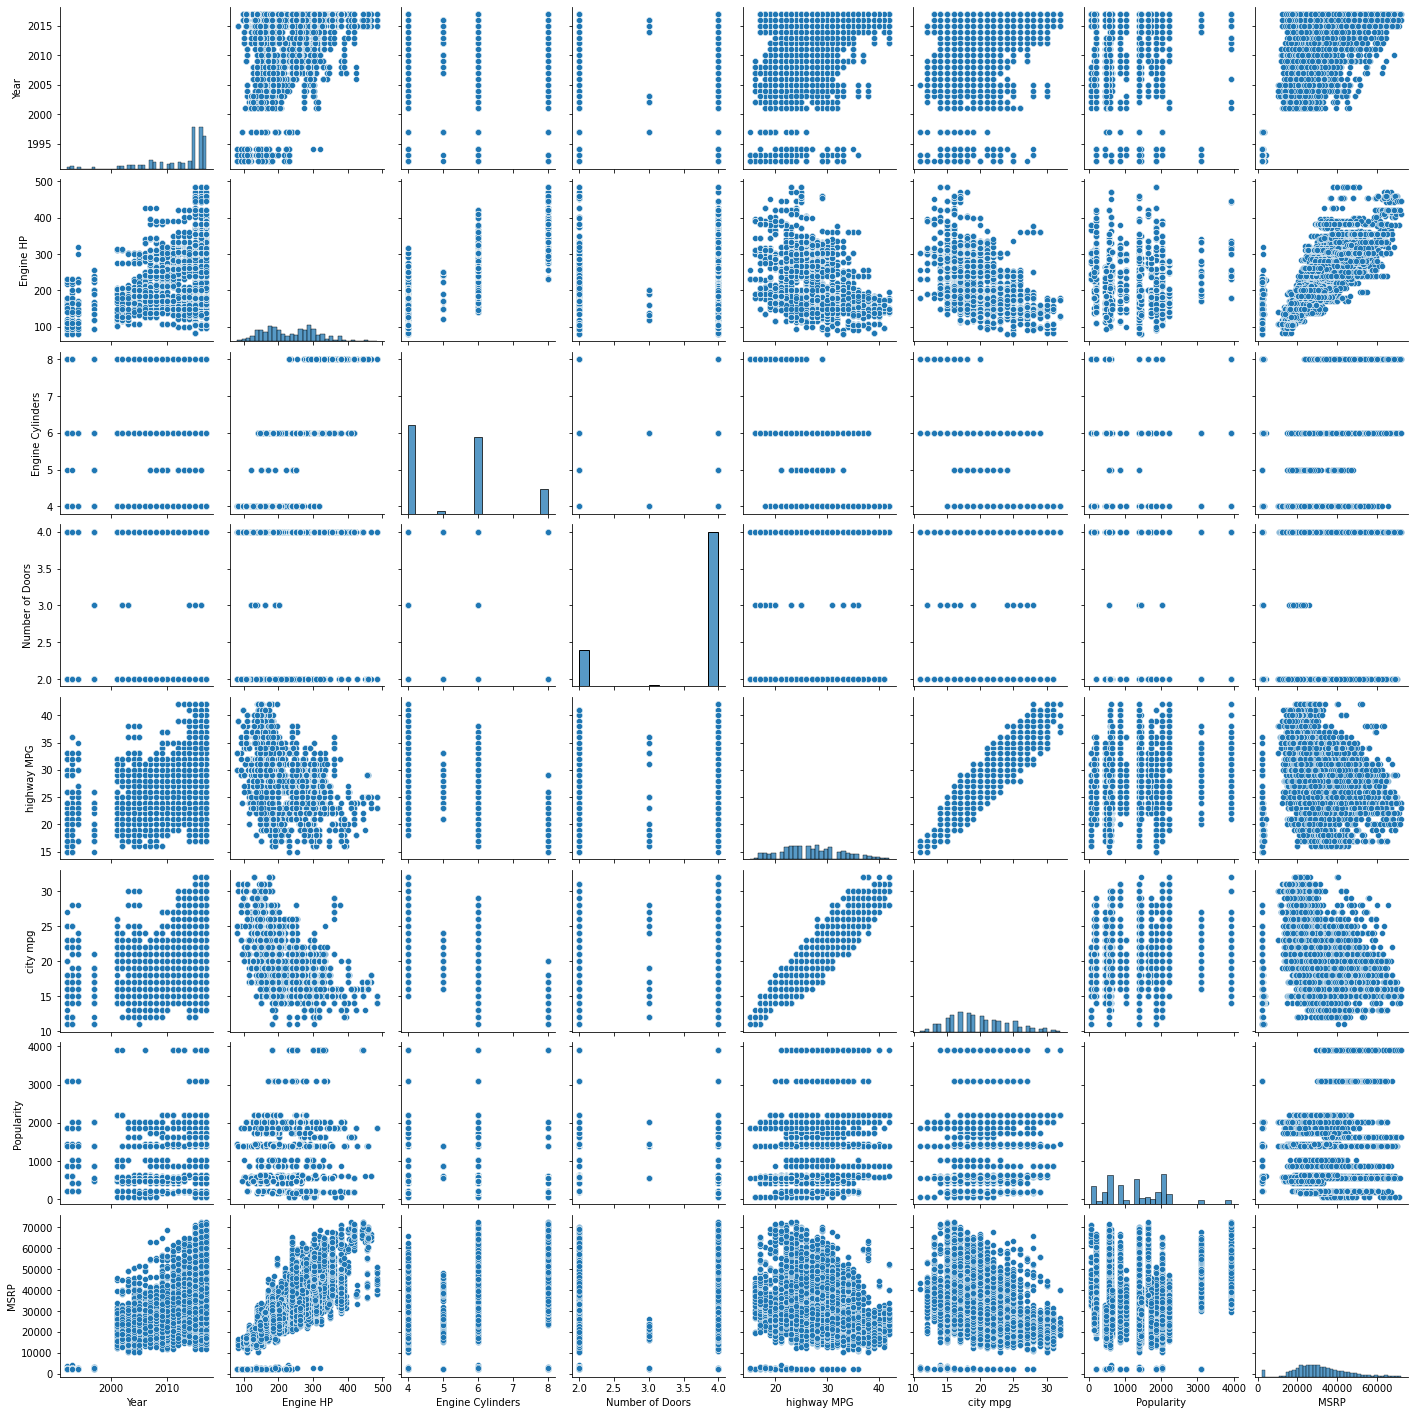

In [ ]:
#Pair plots
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


Converting categorical features into numerical representations using one-hot and label encoding.

In [ ]:
df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']].head()

,Make,Model,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style
1,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Convertible
2,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe
3,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe
4,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Convertible
5,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe


Performing one hot encoding for all categorical features

In [ ]:
df_encoded_onehot = pd.get_dummies(df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']], drop_first=True)


In [ ]:
df_encoded_onehot.columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [ ]:
df_encoded_onehot.head()

,Make,Model,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style
1,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Convertible
2,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe
3,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe
4,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Convertible
5,BMW,1 Series,premium unleaded (required),6,MANUAL,rear wheel drive,2,Compact,Coupe


Performing Label encoding on categorical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']] = df[['Make', 'Model', 'Engine Fuel Type','Engine Cylinders', 'Transmission Type', 'Driven_Wheels','Number of Doors', 'Vehicle Size', 'Vehicle Style']].apply(le.fit_transform)

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,2,0,2011,3,300,2,2,3,0,0,3,28,19,3916,40650
2,2,0,2011,3,300,2,2,3,0,0,4,28,20,3916,36350
3,2,0,2011,3,230,2,2,3,0,0,4,28,18,3916,29450
4,2,0,2011,3,230,2,2,3,0,0,3,28,18,3916,34500
5,2,0,2012,3,230,2,2,3,0,0,4,28,18,3916,31200



- One hot encoding creates a new column for each category in a feature. In this case 770 columns. This results in curse of dimensionality.

- Label encoding assigns a unique integer to each category in a feature. This will not increase the number of columns and makes model training easy. It also maintains the order with other categorical features.

- So, label encoding is a better than one hot encoding of categorical features in this case.


#2. Entropy and Information Gain [1]
- a) Derive the mathematical formula for entropy and calculate the entropy of the target variable (e.g., car price range) in the dataset. [0.25]

- b) Compute the information gain for five specific features: Make, Model, Year, Engine Fuel Type, and Transmission Type. Show detailed calculations and interpret the results. [0.25]

- c) Mathematically demonstrate why information gain can be biased towards features with many values. Discuss how the Information Gain Ratio can mitigate this bias. Calculate the Information Gain Ratio for the selected features. [0.25]

- d) Identify the top three features based on the highest information gain values calculated in part (b). Justify your selection. [0.25]

Derivation of entropy

- Consider, $H\left(\frac{1}{n}, \frac{1}{n}, \frac{1}{n}, \ldots, \frac{1}{n}\right) = A(n)$
- We can decompose a choice from $s^m$ equally likely possibilities into a series of m choices each from s equally likely possibilities and obtain:
$A(s^m) = mA(s)$
- Similarly,
$A(t^n) -nA(t)$
- We can choose n arbitrarily large and find an m to satisfy.
$s^m < t^n < s^(m+1)$
- Thus, taking logarithms and dividing by n log s, where f is arbitrarily small. Now from the monotonic property of
A (n).
- $A(s^m) < A(t^n ) < A (s^{m+1})$
  
  $m A (s) < nA (t) < (m + 1) A (s)$
- Hence, dividing by $nA (s)$
  $m/n <= A(t)/A(s) <= m/n + 1/n < \epsilon $
- A (t) = - K log t

- Now suppose we have a choice from n possibilities with commeasurable probabilities. $P_i = n_i/Σn_i$ where the $n_i$ are integers. We can break down a choice from $Σn_i$ possibilities into a choice from n possibilities with probabilities $p_1,...,p_n$ and then, if the $i^th$ was chosen, a choice from $n_i$ with equal probabilities. Using condition 3 again, we equate the total choice from as  $Σn_i$ computed by two methods.
- $Klogn_i = H(p_1,....,p_n)+KΣp_ilogn_i$
- Hence, $H =  - KΣp_ilogn_i$

- If the $p_i$ are incommeasurable, they may be approximated by
rationals and the same expression must hold by our continuity
assumption. Thus the expression holds in general. The choice of coefficient K is a matter of convenience and amounts to the choice of a unit of measure.

Entropy of MSRP without binning

In [ ]:
df = df[['Make', 'Model', 'Year', 'Engine Fuel Type', 'Transmission Type', 'MSRP']]

In [ ]:
import pandas as pd
import math
#entropy of MSRP
def calculate_probabilities(series):
    total_count = len(series)
    value_counts = series.value_counts()
    probabilities = value_counts / total_count
    return probabilities

def calculate_entropy(probabilities):
    entropy = -sum(prob * math.log2(prob) for prob in probabilities)
    return entropy

probabilities = calculate_probabilities(df['MSRP'])
entropy = calculate_entropy(probabilities)
print(f'Entropy: {entropy}')

Entropy: 11.524728224960189


Entropy of MSRP with binning into 4 labels

In [ ]:
df['MSRP_bin'] = pd.qcut(df['MSRP'], q=4, labels=False)

def calculate_entropy(series):
    probabilities = series.value_counts(normalize=True)
    entropy = -sum(prob * math.log2(prob) for prob in probabilities)
    return entropy

target_entropy = calculate_entropy(df['MSRP_bin'])
print(f'Entropy of MSRP: {target_entropy}')


Entropy of MSRP: 1.999999810053064


To calculate information gain for features make, model, year, engine fuel type and transmission type

In [ ]:
#conditional entropy and IG
def calculate_conditional_entropy(df, feature, target):
    conditional_entropy = 0
    feature_probabilities = df[feature].value_counts(normalize=True)
    for value, prob in feature_probabilities.items():
        print(f'The probability of {value} in feature {feature} is {prob}')
        subset = df[df[feature] == value]
        subset_entropy = calculate_entropy(subset[target])
        conditional_entropy += prob * subset_entropy
        print(f'conditional entropy: {conditional_entropy}  = conditional entropy + {prob}*{subset_entropy}')
    return conditional_entropy

def calculate_information_gain(df, feature, target_entropy, target):
    conditional_entropy = calculate_conditional_entropy(df, feature, target)
    information_gain = target_entropy - conditional_entropy
    print(f'Information Gain: {information_gain} = {target_entropy} - {conditional_entropy}')
    return information_gain


In [ ]:
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Transmission Type']

for feature in features:
  ig = calculate_information_gain(df, feature, target_entropy, 'MSRP_bin')
  print(f'Information Gain for {feature}: {ig}')

The probability of 5 in feature Make is 0.12919696735262262
conditional entropy: 0.25583204416425875  = conditional entropy + 0.12919696735262262*1.980170660399526
The probability of 21 in feature Make is 0.08695652173913043
conditional entropy: 0.4240360080675124  = conditional entropy + 0.08695652173913043*1.9343455848874171
The probability of 22 in feature Make is 0.07457836917840012
conditional entropy: 0.5536361647725878  = conditional entropy + 0.07457836917840012*1.737771395819299
The probability of 17 in feature Make is 0.07163855794522668
conditional entropy: 0.6944943531196165  = conditional entropy + 0.07163855794522668*1.9662342792372491
The probability of 7 in feature Make is 0.06452112022280675
conditional entropy: 0.8162162530704278  = conditional entropy + 0.06452112022280675*1.8865434997172497
The probability of 8 in feature Make is 0.057094228686368556
conditional entropy: 0.9212688081051872  = conditional entropy + 0.057094228686368556*1.8399855370993219
The probabil

Interpreting the information gain values, we get the below order according to importance of features in terms of information gain:

- Model (highest)
- Make
- Year
- Engine Fuel type
- transmission type (Lowest)

Mathematically,

__Information Gain:__

$IG(T, A) = H(T) - H(T|A)$

where,

- IG(T,A) is the Information Gain of attribute 𝐴 with respect to the target variable 𝑇
- H(T) is the entropy of the target variable 𝑇
- H(T∣A) is the conditional entropy of the target variable
𝑇 given the attribute 𝐴

__Information Gain Ratio:__

$IGR(T, A) = \frac{IG(T, A)}{H(A)}$

where,
 - IGR(T,A) is the Information Gain Ratio of attribute 𝐴 with respect to the target variable 𝑇
 - H(A) is the entropy of the attribute 𝐴

In [ ]:
def calculate_split_information(df, feature):
    return calculate_entropy(df[feature])

def calculate_information_gain_ratio(df, feature, target_entropy, target):
    information_gain = calculate_information_gain(df, feature, target_entropy, target)
    split_info = calculate_split_information(df, feature)
    if split_info == 0:
        return 0
    else:
        return information_gain / split_info


In [ ]:
for feature in features:
    igr = calculate_information_gain_ratio(df, feature, target_entropy, 'MSRP_bin')
    print(f'Information Gain Ratio for {feature}: {igr}')


The probability of 5 in feature Make is 0.12919696735262262
conditional entropy: 0.25583204416425875  = conditional entropy + 0.12919696735262262*1.980170660399526
The probability of 21 in feature Make is 0.08695652173913043
conditional entropy: 0.4240360080675124  = conditional entropy + 0.08695652173913043*1.9343455848874171
The probability of 22 in feature Make is 0.07457836917840012
conditional entropy: 0.5536361647725878  = conditional entropy + 0.07457836917840012*1.737771395819299
The probability of 17 in feature Make is 0.07163855794522668
conditional entropy: 0.6944943531196165  = conditional entropy + 0.07163855794522668*1.9662342792372491
The probability of 7 in feature Make is 0.06452112022280675
conditional entropy: 0.8162162530704278  = conditional entropy + 0.06452112022280675*1.8865434997172497
The probability of 8 in feature Make is 0.057094228686368556
conditional entropy: 0.9212688081051872  = conditional entropy + 0.057094228686368556*1.8399855370993219
The probabil

Interpreting from the above results, below is the order as per information gain ratio:

- Model (highest)
- transmission type
- Engine Fuel Type
- make
- year (Lowest)

Information gain tends to have a bias towards attributes with many values due to lower entropy in smaller subsets, but information gain ratio reduces this bias by normalizing it with the split info (indication for number of unique values in the features).

Based on the information gain and the information gain ratio values. The following top 3 features are chosen:
- Model
- Engine Fuel Type
- Transmission type

these features are chosen as they have the highest information gain ratio values compared to other features, and it reduces bias towards features with more values.

#3. Decision Tree and Pruning [1]

- a) Construct a decision tree classifier using the top three features identified from Question 2 (d). Provide a detailed mathematical explanation of the tree construction process, including the criteria for splitting nodes. [0.5]
- b) Visualize the decision tree and interpret its structure. Discuss the significance of each split and the overall tree depth. [0.3]
- c) Implement cost complexity pruning. Evaluate the impact of pruning on the tree’s performance using a train-test split. Discuss the trade-offs between tree complexity and model performance. [0.2]

In [ ]:
df.shape

(6463, 7)

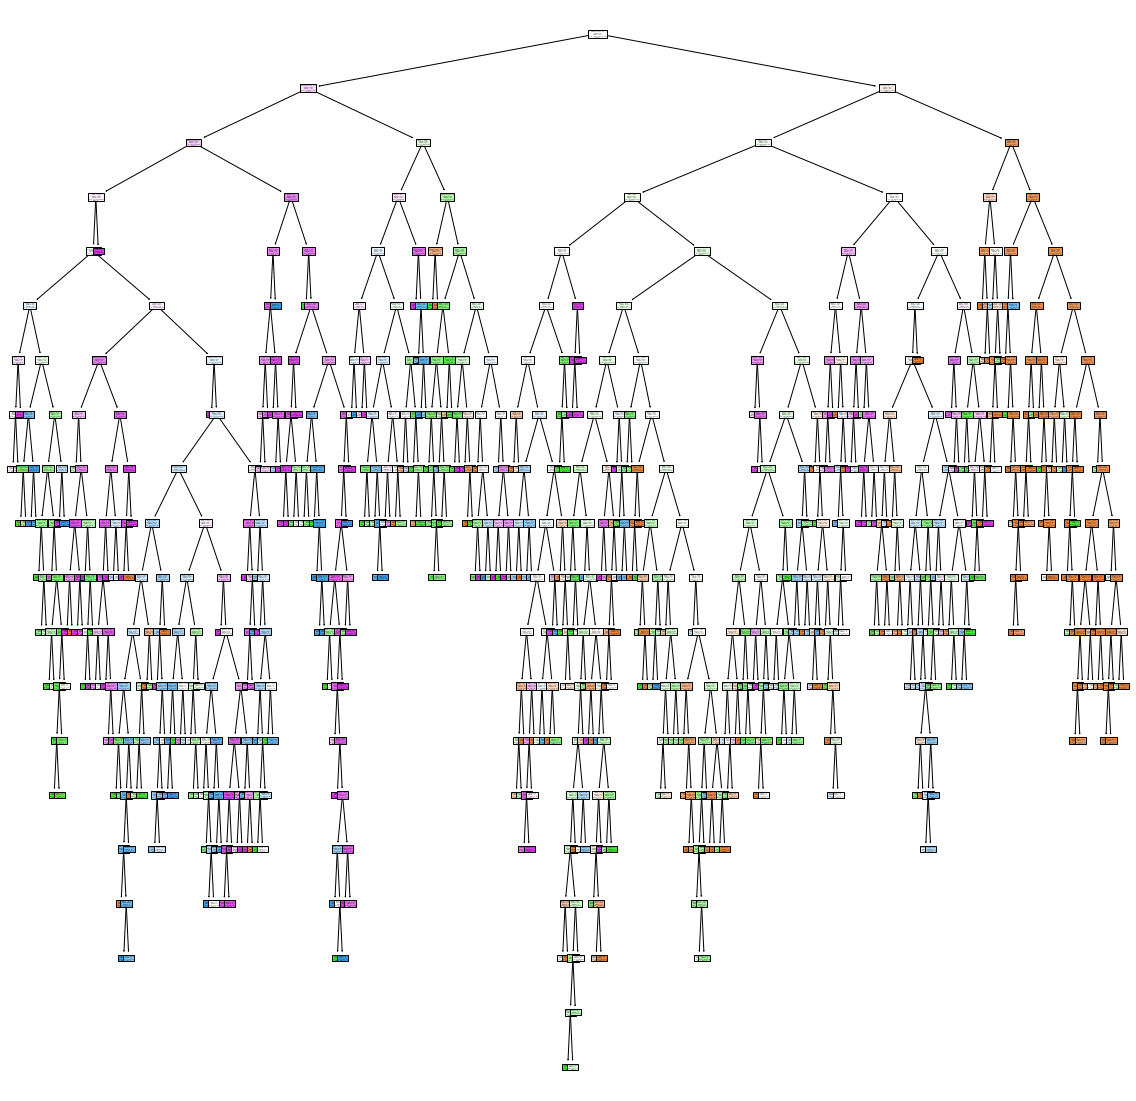

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df[['Engine Fuel Type','Model','Transmission Type']]
y = df['MSRP_bin']

clf = DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train) #train decision tree classifier

plt.figure(figsize=(20, 20))
class_names = [str(c) for c in clf.classes_]
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7447795823665894
Precision: 0.7426722644865285
Recall: 0.7447795823665894
F1 Score: 0.7426990162612633


The decision tree classifier is visualized above with high performance accuracy. To reduce the model complexitiy and cost of traning, we can prune the model by limiting the tree depth.

Implementing pruning by reducing the depth of the decision tree

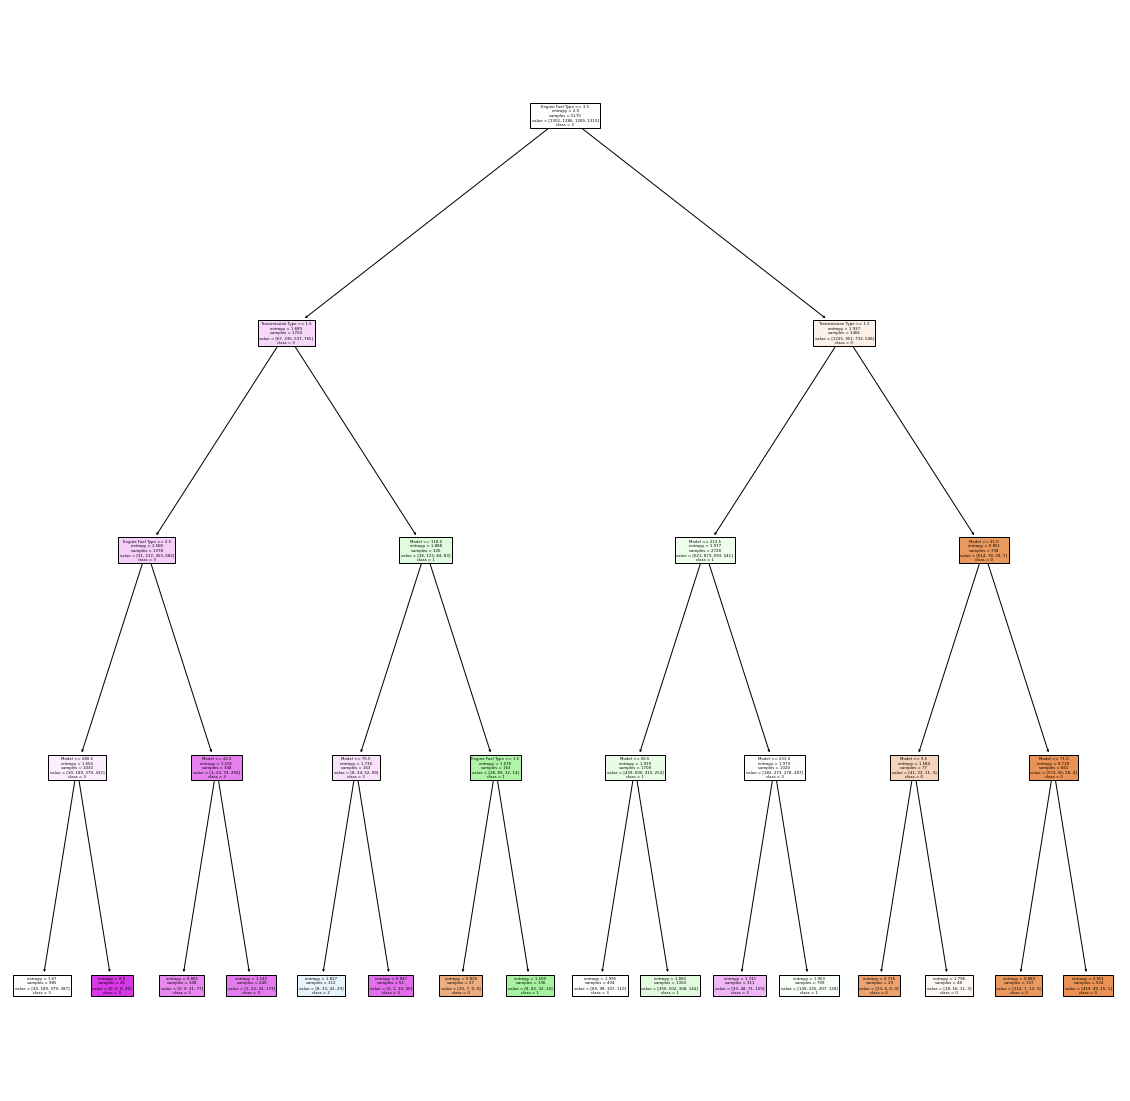

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4) #setting depth to 4 for pruning the model
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
class_names = [str(c) for c in clf.classes_]
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4717710750193349
Precision: 0.5151650158060713
Recall: 0.4717710750193349
F1 Score: 0.4193715527972582


- The decision tree splits are based on information gain ratio and it is calculated at each node for different splits to choose the best split using the feature with highest information gain ratio.
- Interpreting the decision tree classifier, it can be observed that the number of samples are reduced significantly at each split. Indicating good model performance.
- The complexity of the tree has reduced by  pruning it, but it has also lost its very high accuracy rate. But it is not very low, there is a good enough balance between tree complexity and the accuracy rate of the new classifier.
- The train test split is implemented in the ratio 80:20 for testing the model's performance

# 4. Logistic Regression and Statistical Significance [1]
- a) Train a logistic regression model using the same top three features. Provide a detailed explanation of the logistic regression algorithm, including the mathematical derivation of the cost function and gradient descent optimization. [0.5]
- b) Perform a statistical significance test (t-test) for the logistic regression coefficients. Include detailed calculations and interpret the p-values. Discuss which features have a significant impact on the model and why. [0.3]
- c) Compare the logistic regression model’s performance with the decision tree model using evaluation metrics (e.g., ROC-AUC, precision-recall curves). Discuss the differences in their performance and interpretability. [0.2]

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[['Engine Fuel Type','Model','Transmission Type']]
y = df['MSRP_bin']

model = LogisticRegression()
model.fit(X, y) #training logistic regression model

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.41482283769147454


c:\Users\User\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression algorithm:

1. Assuming x is in matrix form, multiply with weights and add bias: $z=wx + b$
2. Compute hypothesis function: $σ(z)= 1/(1+e^{-z})$
3.  Compute the loss function using cross entropy loss: $L_{CE}(y, t) = −tlog y − (1 − t) log(1 − y)$
4. Use gradient descent update rule to optimize loss function: $w_{j+1} = w_j - \alpha \frac{\partial}{\partial w_j} L(w)$, where $\alpha$ is the learning rate.
5. Iterate till convergance
6. To predict, use the hypothesis function to calculate the predicted probability. If the predicted probability >= set threshold, then positive class, else negative. But, in case of multiclassification, use softmax function: $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

Derivation of cost function:

$P(X|Y) = P(X_i)*(1-P(X_i)$

so cost function $J(Θ) = -(1/m) ΣL(Θ;y)$

as we can see $L(Θ)$ is a log likelihood function, so we can establish a relation between cost function and likelihood function:

$J(Θ) = -(1/m)L(Θ)$

and $L(Θ;y) = (1/2)(h_Θ(x)-y)^2$

where $(h_Θ(x)$ is the hypothesis of the logisitic regresion model and y is the expected label.

Gradient descent optimization in logistic regression:

To minimize our cost function, we need to run the gradient descent on each parameter $\theta_j$:

$\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

To update each parameter simultaneously for each iteration. We need to loop through the parameters:
$\theta_0, \theta_1, …, \theta_n$

in vector $\theta = [\theta_0, \theta_1, ..., \theta_n]$.

To derive
$\frac{\partial}{\partial \theta_j} J(\theta)$:

$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$


This leads to the gradient descent update rule in logistic regression:


$\theta_j \gets \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$


Reference: https://www.baeldung.com/cs/gradient-descent-logistic-regression

In [ ]:
from scipy import stats

std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X.T, X))))

# t-statistics
t_stat = model.coef_[0] / std_err

# p-values
p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stat)))

print("Coefficient\t\tt-statistic\t\tp-value")
for i, coef in enumerate(model.coef_[0]):
    print(f"{X.columns[i]:<20}\t{t_stat[i]:.4f}\t\t\t{p_values[i]:.4f}")


Coefficient		t-statistic		p-value
Engine Fuel Type    	101.2224			0.0000
Model               	3.4577			0.0005
Transmission Type   	74.7931			0.0000


- Engine Fuel Type: A large positive t-value and a very low p-value suggest a strong association between the type of engine fuel and a high MSRP.

- Model: Although the t-value is negative, its low p-value indicates that specific vehicle models significantly influence the MSRP, potentially leading to lower prices.

- Transmission Type: With a large positive t-value and a very low p-value, the type of transmission also strongly influences the predicted probability of a high MSRP.

Comparing the performance of logistic regression model and decision tree classifier:

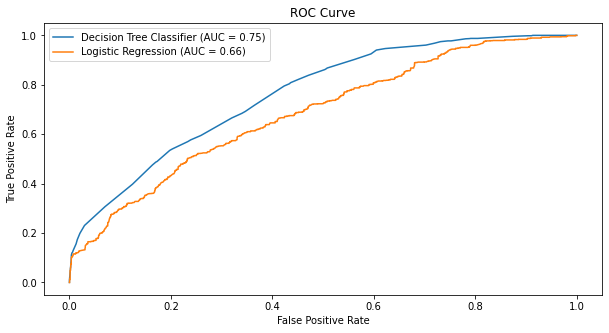

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# get probabilities from the models
y_proba_dt = clf.predict_proba(X_test)
y_proba_lr = model.predict_proba(X_test)

# convert the target variable to binary for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# calculate ROC-AUC scores
roc_auc_dt = roc_auc_score(y_test_bin, y_proba_dt, average='macro')
roc_auc_lr = roc_auc_score(y_test_bin, y_proba_lr, average='macro')

# calculate ROC curves for decision tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_proba_dt.ravel())
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), y_proba_lr.ravel())

plt.figure(figsize=(10, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree Classifier (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- The decision tree has a higher area under the curve than the logistic regression model. Hence, is a better performing model.

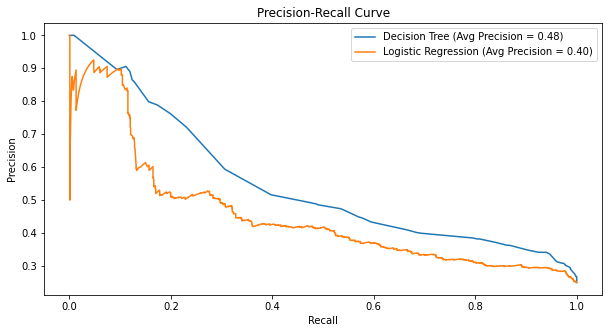

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# calculate precision-recall curves
precision_dt, recall_dt, _ = precision_recall_curve(y_test_bin.ravel(), y_proba_dt.ravel())
avg_precision_dt = average_precision_score(y_test_bin, y_proba_dt, average='macro')

precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), y_proba_lr.ravel())
avg_precision_lr = average_precision_score(y_test_bin, y_proba_lr, average='macro')

plt.figure(figsize=(10, 5))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (Avg Precision = {avg_precision_dt:.2f})')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (Avg Precision = {avg_precision_lr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

- The decision tree is better performing model than the logistic regression model as the average precision rate is higher than the other.

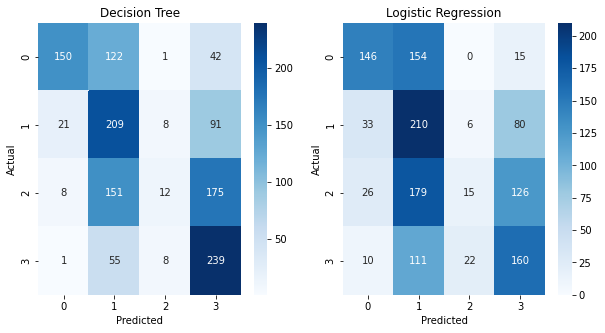

In [ ]:
#confusion matrix for both models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_dt = confusion_matrix(y_test, clf.predict(X_test))
cm_lr = confusion_matrix(y_test, model.predict(X_test))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(cm_dt, annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_lr, annot=True, fmt="d", ax=axes[1], cmap="Blues")
axes[1].set_title("Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

- The decision tree seems to perform overall good in all the 4 bins of the MSRP_bin target, but a little poor in label 2.
- The logistic regression model performs poorly for most of the labels.

# 5. Support Vector Machines and Hyper Parameter Tuning [1]
- a) Implement a Support Vector Machine (SVM) classifier for the dataset. Provide mathematical formulation of the hinge loss function and the concept of the maximum margin classifier. [0.5]
- b) Perform hyperparameter tuning using grid search and a train-test split. Specifically, vary the kernel function (linear, polynomial, RBF) and the regularization parameter C. Briefly discuss the impact of these hyperparameters on model performance. [0.3]
- c) Compare the performance of the SVM model with the decision tree and logistic regression models. Provide a detailed discussion on the advantages and disadvantages of each model based on their performance, computational complexity, and interpretability. [0.2]

In [ ]:
import numpy as np
from sklearn.svm import SVC

X = df[['Engine Fuel Type','Model','Transmission Type']]
y = df['MSRP_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear') #svm with linear kernel and c = 1.0 (default)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4075792730085073


Mathematically,

 - Hinge Loss function:

$L(y, f(x)) = \max(0, 1 - y f(x))$


- For a binary classification problem, the decision boundary can be defined as:
$wx+b=0$
where, w is the weight vector and b is the bias term.

- Hence, Max-Margin Classifier:

$min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2$

- with Constraints

$y^{(i)} (\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \geq 1 \quad \forall \, i$

- Max Margin with regularization

$min_{\mathbf{w}, b, \boldsymbol{\xi}} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{m} \xi^{(i)}$

Hyperparameter tuning

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X = df[['Engine Fuel Type','Model','Transmission Type']]
y = df['MSRP_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # kernels
    'C': [0.1, 1, 10]  # regularization parameter
}

svc = SVC(probability=True)

# with parallel processing
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  # 3-fold CV

# train the classifier with grid search
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Best parameters found:  {'C': 1, 'kernel': 'linear'}
Best accuracy score:  0.40715498292291313
Test set accuracy: 0.4075792730085073


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_kernel', 'param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nPerformance of each hyperparameter combination:")
print(results)


Performance of each hyperparameter combination:
  param_kernel param_C  mean_test_score  std_test_score  rank_test_score
0       linear     0.1         0.402900        0.008510                2
1         poly     0.1         0.262282        0.001208                9
2          rbf     0.1         0.300583        0.015195                6
3       linear       1         0.407155        0.009066                1
4         poly       1         0.279110        0.006606                8
5          rbf       1         0.300774        0.008081                5
6       linear      10         0.398449        0.012446                3
7         poly      10         0.299227        0.004109                7
8          rbf      10         0.357640        0.004313                4


- It has been observed that after performing grid search, the kernel parameter 'linear' with regularization factor '1'.
- rbf kernels have performed averagely and poly kernels have performed the worst

Comparing the performance of logistic regression model and decision tree classifier:

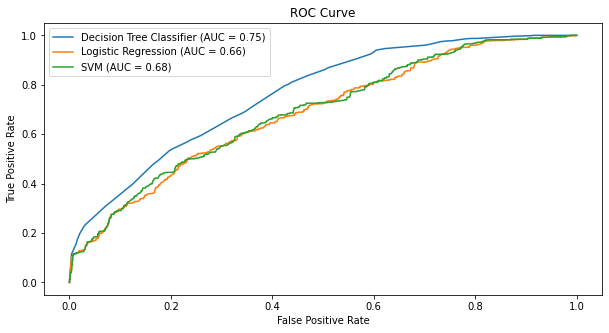

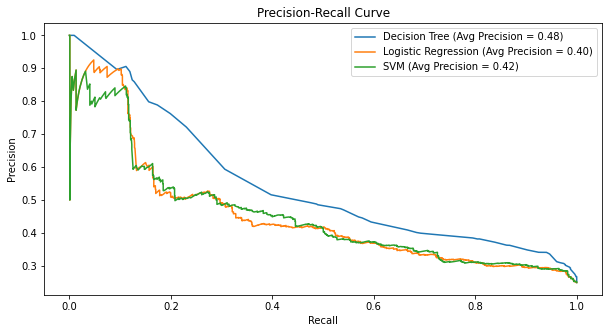

Decision Tree Accuracy: 0.47
Logistic Regression Accuracy: 0.41
SVM Accuracy: 0.41


In [ ]:
# calculate probabilities
y_proba_dt = clf.predict_proba(X_test)
y_proba_lr = model.predict_proba(X_test)
y_proba_svm = best_model.predict_proba(X_test)

# convert the target variable to binary for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# calculate ROC-AUC scores
roc_auc_dt = roc_auc_score(y_test_bin, y_proba_dt, average='macro')
roc_auc_lr = roc_auc_score(y_test_bin, y_proba_lr, average='macro')
roc_auc_svm = roc_auc_score(y_test_bin, y_proba_svm, average='macro')

# calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_proba_dt.ravel())
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), y_proba_lr.ravel())
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_proba_svm.ravel())

plt.figure(figsize=(10, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree Classifier (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

precision_dt, recall_dt, _ = precision_recall_curve(y_test_bin.ravel(), y_proba_dt.ravel())
avg_precision_dt = average_precision_score(y_test_bin, y_proba_dt, average='macro')

precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), y_proba_lr.ravel())
avg_precision_lr = average_precision_score(y_test_bin, y_proba_lr, average='macro')

precision_svm, recall_svm, _ = precision_recall_curve(y_test_bin.ravel(), y_proba_svm.ravel())
avg_precision_svm = average_precision_score(y_test_bin, y_proba_svm, average='macro')

plt.figure(figsize=(10, 5))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (Avg Precision = {avg_precision_dt:.2f})')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (Avg Precision = {avg_precision_lr:.2f})')
plt.plot(recall_svm, precision_svm, label=f'SVM (Avg Precision = {avg_precision_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

accuracy_dt = accuracy_score(y_test, clf.predict(X_test))
accuracy_lr = accuracy_score(y_test, model.predict(X_test))
accuracy_svm = accuracy_score(y_test, best_model.predict(X_test))

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

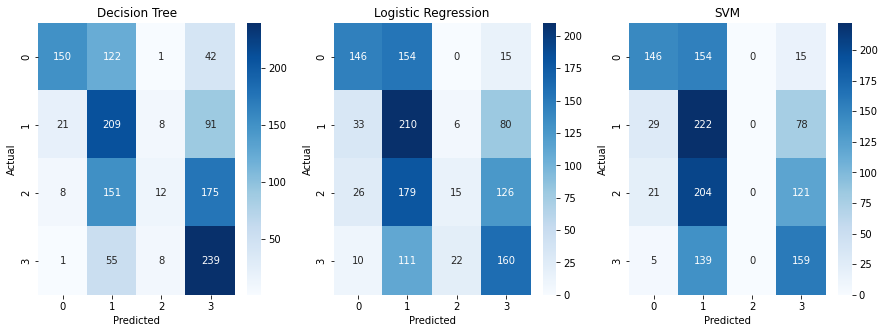

In [ ]:
#plot confusion matrix
cm_dt = confusion_matrix(y_test, clf.predict(X_test))
cm_lr = confusion_matrix(y_test, model.predict(X_test))
cm_svm = confusion_matrix(y_test, best_model.predict(X_test))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_dt, annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_lr, annot=True, fmt="d", ax=axes[1], cmap="Blues")
axes[1].set_title("Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_svm, annot=True, fmt="d", ax=axes[2], cmap="Blues")
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.show()

1. In terms of performance,
- decision tree has a higher accuracy rate compared to the other models
- logistic regression model and SVM have resulted in the same accuracy

2. In terms of computationaly complexity,
- logistic regression model train time was the least
- decision tree model without pruning was highly complex, but after pruning performed significantly better
- SVM without tuning was highly complex in terms of train time and model complexity, and with grid search technique the time complexity is exponentially increased.

3. In terms of interpretability,
- the decision tree is highly interpretable to an average human as it is rule based model with yes/no answers.
- SVM model is next best in terms of interpretability as the user can visualize the decision boundary
- the least interpretable would be logistic regression due to the presence of hypothesis and gradient descent algorithm for minimizing the weights.

Overall, the decision tree classifier is the chosen model with a good trade off between model computational complexity, interpretability, and performance.